# Explore here

It's recommended to use this notebook for exploration purposes.

In [1]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
url = "https://companiesmarketcap.com/tesla/revenue/"
html_data = requests.get(url, time.sleep(10)).text


if "403 ERROR" in html_data:
    headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36"}
    request = requests.get(url, headers = headers)
    time.sleep(10)
    html_data = request.text

html_data

'<!DOCTYPE html>\n<html lang="en-US">\n<head>\n<title>Tesla (TSLA) - Revenue</title>\n<meta charset="utf-8"/>\n<link rel="shortcut icon" href="https://companiesmarketcap.com/favicon.ico" type="image/x-icon">\n<link rel="apple-touch-icon" sizes="57x57" href="/img/icons/apple-icon-57x57.png">\n<link rel="apple-touch-icon" sizes="60x60" href="/img/icons/apple-icon-60x60.png">\n<link rel="apple-touch-icon" sizes="72x72" href="/img/icons/apple-icon-72x72.png">\n<link rel="apple-touch-icon" sizes="76x76" href="/img/icons/apple-icon-76x76.png">\n<link rel="apple-touch-icon" sizes="114x114" href="/img/icons/apple-icon-114x114.png">\n<link rel="apple-touch-icon" sizes="120x120" href="/img/icons/apple-icon-120x120.png">\n<link rel="apple-touch-icon" sizes="144x144" href="/img/icons/apple-icon-144x144.png">\n<link rel="apple-touch-icon" sizes="152x152" href="/img/icons/apple-icon-152x152.png">\n<link rel="apple-touch-icon" sizes="180x180" href="/img/icons/apple-icon-180x180.png">\n<link rel="icon

### Transform the HTML and create table

In [3]:
# Parse the HTML content
soup = BeautifulSoup(html_data, "html.parser")
soup

<!DOCTYPE html>

<html lang="en-US">
<head>
<title>Tesla (TSLA) - Revenue</title>
<meta charset="utf-8"/>
<link href="https://companiesmarketcap.com/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/img/icons/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/img/icons/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
<link href="/img/icons/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
<link href="/img/icons/apple-icon-76x76.png" rel="apple-touch-icon" sizes="76x76"/>
<link href="/img/icons/apple-icon-114x114.png" rel="apple-touch-icon" sizes="114x114"/>
<link href="/img/icons/apple-icon-120x120.png" rel="apple-touch-icon" sizes="120x120"/>
<link href="/img/icons/apple-icon-144x144.png" rel="apple-touch-icon" sizes="144x144"/>
<link href="/img/icons/apple-icon-152x152.png" rel="apple-touch-icon" sizes="152x152"/>
<link href="/img/icons/apple-icon-180x180.png" rel="apple-touch-icon" sizes="180x180"/>
<link href="/img/ico

In [4]:
import json
import pandas as pd

# HTML content (replace this with the actual HTML content from requests or file)
html_content = """
<script src="/js/chart1.js?v=37"></script>
<script type="text/javascript">
data = {"2024":97150000000,"2023":96773000000,"2022":81462000000,"2021":53823000000,"2020":31536000000,"2019":24578000000,"2018":21460855000,"2017":11758751000,"2016":7000132000,"2015":4046025000,"2014":3198356000,"2013":2013496000,"2012":413256000,"2011":204242000,"2010":116744000,"2009":111943000};
var chart1 = new CmcChart();
chart1.dateFormat = 'y';
chart1.currencySymbol = '$';
chart1.loadChart(document.getElementById('marketcapchart'), data);
</script>
"""


# Parse the HTML content
soup_data = BeautifulSoup(html_content, "html.parser")

# Find the script tag containing the data
script_tag = soup.find('script', text=lambda x: x and "data =" in x)

# Extract the data string from the script
data_str = script_tag.string.split('data =')[1].split(';')[0].strip()

# Convert the JSON-like string to a Python dictionary
data_dict = json.loads(data_str)

# Convert the dictionary to a DataFrame
df = pd.DataFrame(list(data_dict.items()), columns=["Year", "MarketCap"])

# Rename the column "Market Cap" to "Revenue"
df = df.rename(columns={"MarketCap": "Revenue"})

# Sort the DataFrame by Year (optional)
df = df.sort_values("Year", ascending=False).reset_index(drop=True)

# Display the DataFrame
df

/tmp/ipykernel_81961/1054975558.py:21: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  script_tag = soup.find('script', text=lambda x: x and "data =" in x)


,Year,Revenue
0,2024,97150000000
1,2023,96773000000
2,2022,81462000000
3,2021,53823000000
4,2020,31536000000
5,2019,24578000000
6,2018,21460855000
7,2017,11758751000
8,2016,7000132000
9,2015,4046025000


In [5]:
# Step 4: Process the DataFrame

# Remove $ and commas from the Revenue column and convert to numeric
df['Revenue'] = df['Revenue'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Drop rows where Revenue is empty or invalid
df = df.dropna(subset=['Revenue'])

# Display the cleaned DataFrame
df


,Year,Revenue
0,2024,9.715000e+10
1,2023,9.677300e+10
2,2022,8.146200e+10
3,2021,5.382300e+10
4,2020,3.153600e+10
5,2019,2.457800e+10
6,2018,2.146086e+10
7,2017,1.175875e+10
8,2016,7.000132e+09
9,2015,4.046025e+09


In [6]:
tesla_revenue = df[df["Revenue"] != ""]
tesla_revenue

,Year,Revenue
0,2024,9.715000e+10
1,2023,9.677300e+10
2,2022,8.146200e+10
3,2021,5.382300e+10
4,2020,3.153600e+10
5,2019,2.457800e+10
6,2018,2.146086e+10
7,2017,1.175875e+10
8,2016,7.000132e+09
9,2015,4.046025e+09


### Store data in Sqlite

In [7]:
import sqlite3

# Connect to SQLite (creates the database file if it doesn't exist)
connection = sqlite3.connect("Tesla_Revenue.db")
connection

In [8]:
cursor = connection.cursor()
cursor.execute('''
CREATE TABLE IF NOT EXISTS TeslaRevenue (
    Year INTEGER PRIMARY KEY,
    Revenue REAL
)
''')

In [9]:
# Insert the cleaned data into the table
for _, row in df.iterrows():
    cursor.execute('''
    INSERT OR REPLACE INTO TeslaRevenue (Year, Revenue)
    VALUES (?, ?)
    ''', (row['Year'], row['Revenue']))

In [10]:

connection.commit()
connection.close()

In [11]:
# Connect to the database
conn = sqlite3.connect('Tesla_Revenue.db')

# Query the data
df_from_db = pd.read_sql_query("SELECT * FROM TeslaRevenue", conn)

# Display the data
print(df_from_db)

    Year       Revenue
0   2009  1.119430e+08
1   2010  1.167440e+08
2   2011  2.042420e+08
3   2012  4.132560e+08
4   2013  2.013496e+09
5   2014  3.198356e+09
6   2015  4.046025e+09
7   2016  7.000132e+09
8   2017  1.175875e+10
9   2018  2.146086e+10
10  2019  2.457800e+10
11  2020  3.153600e+10
12  2021  5.382300e+10
13  2022  8.146200e+10
14  2023  9.677300e+10
15  2024  9.715000e+10


In [12]:
# Close the connection
conn.close()

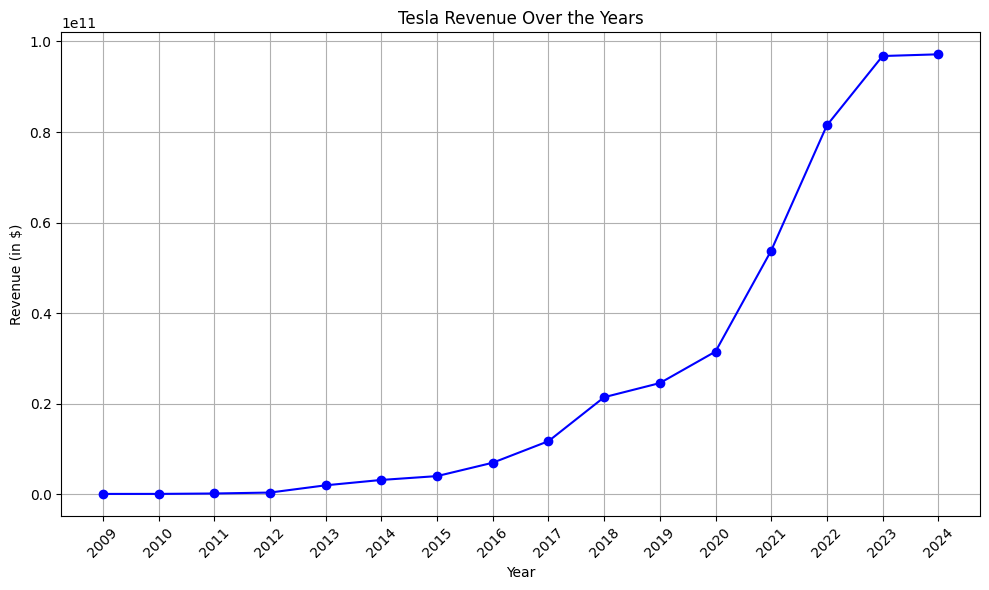

In [13]:
import matplotlib.pyplot as plt

# Reconnect to the database
conn = sqlite3.connect('Tesla_Revenue.db')

# Query the data
df = pd.read_sql_query("SELECT * FROM TeslaRevenue ORDER BY Year ASC", conn)

# Close the connection
conn.close()

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Revenue'], marker='o', linestyle='-', color='blue')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Revenue (in $)')
plt.title('Tesla Revenue Over the Years')
plt.grid(True)

# Customize x-axis ticks for better readability
plt.xticks(df['Year'], rotation=45)

# Show the plot
plt.tight_layout()
plt.show()
